# Laboratorio 3 - Visión por Computadora

Autores:

- Nelson García
- Diego Linares
- Joaquín Puente

## Task 1 

Usted deberá demostrar comprensión teórica del criterio de Harris sin usar librerías. Para ello considere lo
siguiente.
Se te da la siguiente Matriz del Segundo Momento (Tensor de Estructura) M calculada en un píxel
específico (u,v) de una imagen:

   

$ M = \begin{bmatrix} 120 & 5 \\ 5 & 115 \end{bmatrix} $

Y una segunda matriz M’ para otro píxel diferente:

$ M' = \begin{bmatrix} 200 & 10 \\ 10 & 1 \end{bmatrix} $

  

Con esta información haga lo siguiente:

1. Calcule manualmente (muestra tu procedimiento) los Eigenvalores (λ1, λ2) para ambas matrices

Para hallar los eigenvalores hay que resolver la siguiente ecuación:

$ det(A - \lambda * I) = 0 $

En este caso para $ A = M $

$ det(M - \lambda * I) = 0 $

$ det( \begin{bmatrix} 120 & 5 \\ 5 & 115 \end{bmatrix} - \begin{bmatrix} \lambda  \\ \lambda \end{bmatrix} * \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} 120 & 5 \\ 5 & 115 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} \lambda - 120 & 5 \\ 5 & \lambda - 115 \end{bmatrix} ) = 0$

$ (\lambda - 120) (\lambda - 115) - 25 = 0 $

$ \lambda^2 - 120\lambda - 115\lambda + 13800 - 15 = \lambda^2 - 235\lambda + 13775 = 0 $

Se calculan las raíces con la fórmula cuadrática:

$ \lambda = \frac{235 \pm \sqrt{235^2 - 4(1)(13775)}}{2(1)} $

$ \lambda = \frac{235 \pm \sqrt{55225 - 55100}}{2} $

$ \lambda = \frac{235 \pm \sqrt{125}}{2} $

$ \lambda_1 = 123.09, \lambda_2 = 111.91 $ 

---

Para $ A = M' $

$ det(M' - \lambda * I) = 0 $

$ det( \begin{bmatrix} 200 & 10 \\ 10 & 1 \end{bmatrix} - \begin{bmatrix} \lambda  \\ \lambda \end{bmatrix} * \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} 200 & 10 \\ 10 & 1 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} ) = 0 $

$ det( \begin{bmatrix} \lambda - 200 & 10 \\ 10 & \lambda - 1 \end{bmatrix} ) = 0$

$ (\lambda - 200) (\lambda - 1) - 100 = 0 $

$ \lambda^2 - 200\lambda - 1\lambda + 200 - 100 = \lambda^2 - 201\lambda + 100 = 0 $

Se calculan las raíces con la fórmula cuadrática:

$ \lambda = \frac{201 \pm \sqrt{201^2 - 4(1)(100)}}{2(1)} $

$ \lambda = \frac{201 \pm \sqrt{40401 - 400}}{2} $

$ \lambda = \frac{201 \pm \sqrt{40001}}{2} $

$ \lambda_1 =200.05, \lambda_2 = 0.50 $ 

2. Calcule la Respuesta de Harris (R) para ambas matrices usando la fórmula vista en clase. Asuma k
= 0.04

$ R_{M} = det(M) - k(trace(M))^2 $

$ det(M) =  \lambda_1 * \lambda_2 , trace(M) = \lambda_1 + \lambda_2 $

$ R_{M} = \lambda_{1M} * \lambda_{2M} - k(\lambda_{1M} + \lambda_{2M})^2 $

$ R_{M} = 123.09 * 111.91 - 0.04 (123.09 + 111.91)^2 $

$ R_{M} = 13775.0019 - 0.04(235)^2 = 13775.0019 - 0.04(55225) = 13775.0019 - 2209 = 11566.0019 $

--- 

$ R_{M'} = det(M') - k(trace(M'))^2 $

$ R_{M'} = \lambda_{1M'} * \lambda_{2M'} - k(\lambda_{1M'} + \lambda_{2M'})^2 $

$ R_{M'} = 200.05 * 0.5 - 0.04 (200.05 + 0.5)^2 = 100.025 - 0.04(200.55)^2 $

$ R_{M'} = 100.025 - 0.04(40220.3025) = 100.025 - 1608.8121 = - 1508.7871 $


3. Basado en tus resultados numéricos, clasifica qué representa cada píxel geométricamente: ¿Es una
Esquina, un Borde o una Región Plana? Justifica tu respuesta usando las definiciones de
eigenvalores vistas en clase.

$ R_{M} = 11566.0019 $ Y $ \lambda_1 = 123.09, \lambda_2 = 111.91 $ 

Como $ \lambda_1 $ y $\lambda_2$ son grandes y $R_{M} > 0$, este punto es candidato a esquina.

$ R_{M'} = - 1508.7871 $ Y $ \lambda_1 =200.05, \lambda_2 = 0.50 $ 

Como $\lambda_1 >> \lambda_2$  y $R_{M} < 0$, este punto es candidato a un borde.


## Task 2

En Esta parte se busca que usted implemente un sistema de correspondencia completo. Para esto debe
escribir un script en Python usando OpenCV. No se provee código base, debe estructurarlo usted mismo


In [3]:
import cv2
import numpy as np
from typing import Tuple, List, Optional
from matplotlib import pyplot as plt


def load_images_gray(path1: str, path2: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    if img1 is None:
        raise FileNotFoundError(f"No se pudo cargar: {path1}")
    if img2 is None:
        raise FileNotFoundError(f"No se pudo cargar: {path2}")

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    return color1, gray1, color2, gray2


def detect_and_describe_sift(gray: np.ndarray):
    sift = cv2.SIFT_create()
    kp, desc = sift.detectAndCompute(gray, None)
    return kp, desc


def detect_and_describe_orb(gray: np.ndarray, nfeatures: int = 2000):
    orb = cv2.ORB_create(nfeatures=nfeatures)
    kp, desc = orb.detectAndCompute(gray, None)
    return kp, desc


def build_matcher(algo: str) -> cv2.BFMatcher:
    if algo.upper() == "SIFT":
        return cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    elif algo.upper() == "ORB":
        return cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    else:
        raise ValueError(f"Algoritmo no soportado: {algo}")


def knn_match(desc1: Optional[np.ndarray], desc2: Optional[np.ndarray], matcher: cv2.BFMatcher, k: int = 2):
    if desc1 is None or desc2 is None:
        return []
    return matcher.knnMatch(desc1, desc2, k=k)


def lowe_ratio_test(matches_knn, ratio: float = 0.75) -> List[cv2.DMatch]:
    good = []
    for match in matches_knn:
        if len(match) == 2:
            m, n = match
            if m.distance < ratio * n.distance:
                good.append(m)
    return good


def draw_good_matches(
    img1_color: np.ndarray,
    kp1,
    img2_color: np.ndarray,
    kp2,
    good_matches: List[cv2.DMatch],
    max_draw: int = 200
) -> np.ndarray:
    result = cv2.drawMatches(
        img1_color, kp1,
        img2_color, kp2,
        good_matches[:max_draw],
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    return result


def run_task2_pipeline(path_img1: str, path_img2: str, ratio: float = 0.75):
    color1, gray1, color2, gray2 = load_images_gray(path_img1, path_img2)

    kp1_sift, desc1_sift = detect_and_describe_sift(gray1)
    kp2_sift, desc2_sift = detect_and_describe_sift(gray2)
    matcher_sift = build_matcher("SIFT")
    matches_sift = knn_match(desc1_sift, desc2_sift, matcher_sift)
    good_sift = lowe_ratio_test(matches_sift, ratio)
    print(f"SIFT: {len(kp1_sift)} kp img1, {len(kp2_sift)} kp img2, "
          f"{len(matches_sift)} matches totales, {len(good_sift)} buenos matches")

    kp1_orb, desc1_orb = detect_and_describe_orb(gray1)
    kp2_orb, desc2_orb = detect_and_describe_orb(gray2)
    matcher_orb = build_matcher("ORB")
    matches_orb = knn_match(desc1_orb, desc2_orb, matcher_orb)
    good_orb = lowe_ratio_test(matches_orb, ratio)
    print(f"ORB:  {len(kp1_orb)} kp img1, {len(kp2_orb)} kp img2, "
          f"{len(matches_orb)} matches totales, {len(good_orb)} buenos matches")

    img_sift = draw_good_matches(color1, kp1_sift, color2, kp2_sift, good_sift)
    img_orb = draw_good_matches(color1, kp1_orb, color2, kp2_orb, good_orb)

    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    axes[0].imshow(img_sift)
    axes[0].set_title(f"SIFT — {len(good_sift)} buenos matches (ratio={ratio})")
    axes[0].axis("off")

    axes[1].imshow(img_orb)
    axes[1].set_title(f"ORB — {len(good_orb)} buenos matches (ratio={ratio})")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

SIFT: 6662 kp img1, 2045 kp img2, 6662 matches totales, 169 buenos matches
ORB:  2000 kp img1, 2000 kp img2, 2000 matches totales, 17 buenos matches


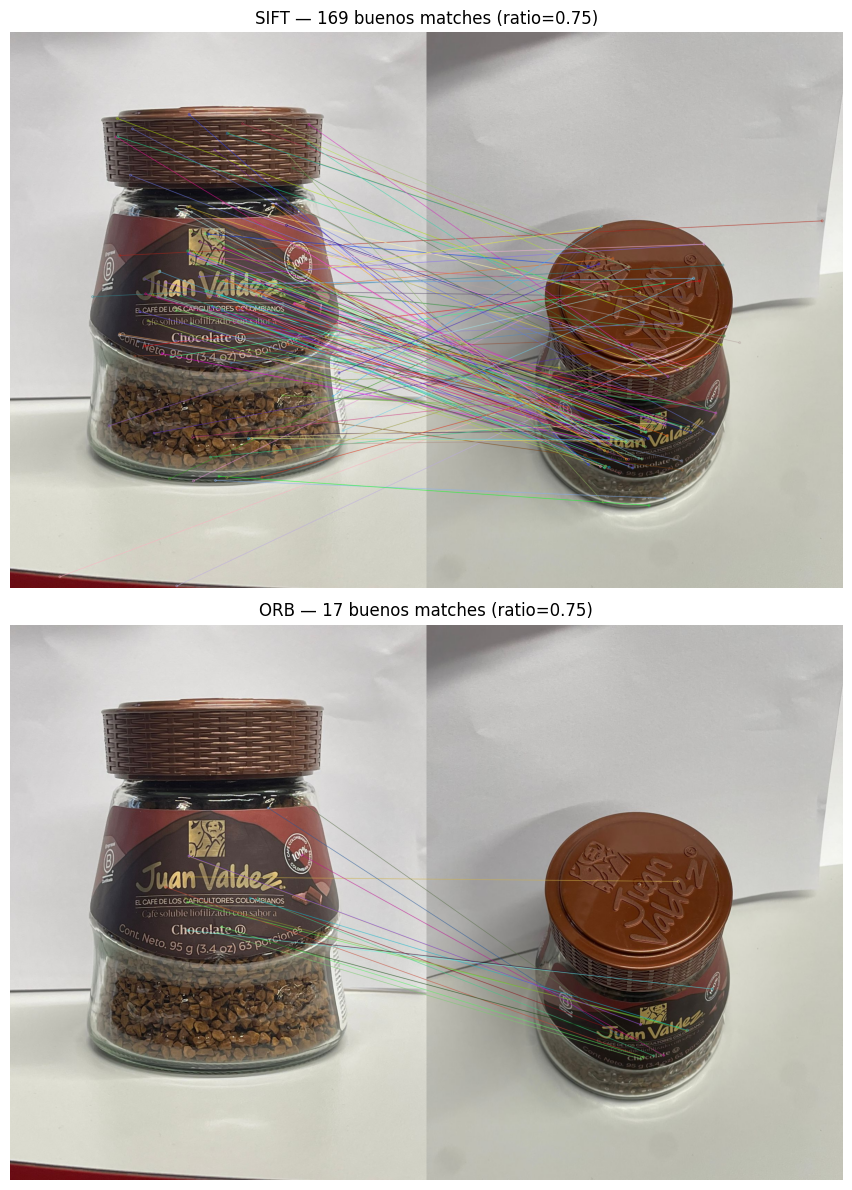

In [4]:
# Cambiar las rutas a tus imágenes (vista frontal y vista rotada/escalada)
run_task2_pipeline("img1.jpeg", "img2.jpeg")